# PyTorch and CIFAR10 data analysis

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [8]:
sns.set_theme(style='white', palette='pastel')

In [9]:
DATA_DIRNAME = 'csv'

MODEL_INDEX = -2
EXPERIMENT_INDEX = -1
RUN_INDEX = None  # If None, all runs will be loaded

In [10]:
model_dirnames_all = sorted(
    [file.name for file in os.scandir(DATA_DIRNAME)
     if file.is_dir() and not file.name.startswith('.')])
model_dirname = model_dirnames_all[MODEL_INDEX]

print(f'Selected model\n- {model_dirname}\n')
print(f'Models\n- {f"{chr(10)}- ".join(model_dirnames_all)}')

Selected model
- torchskeleton-defworker

Models
- fast
- fast-mnist
- torchskeleton-defworker
- torchskeleton-noworker


In [11]:
experiment_dirnames_all = sorted(
    [file.name for file
     in os.scandir(os.path.join(DATA_DIRNAME, model_dirname))
     if file.is_dir() and not file.name.startswith('.')])
experiment_dirname = experiment_dirnames_all[EXPERIMENT_INDEX]

print(f'Selected experiment\n- {experiment_dirname}\n')
print(f'Experiments\n- {f"{chr(10)}- ".join(experiment_dirnames_all)}')

Selected experiment
- 2021-11-18-19-13-12-core1-nohyper

Experiments
- 2021-11-18-08-24-17-gpu
- 2021-11-18-10-17-15-core1,3-nohyper
- 2021-11-18-13-47-22-core1-hyper
- 2021-11-18-19-13-12-core1-nohyper


In [12]:
run_filenames_all = sorted(
    [file.name for file
     in os.scandir(os.path.join(
         DATA_DIRNAME,
         model_dirname,
         experiment_dirname))
     if file.is_file() and not file.name.startswith('.')])

if RUN_INDEX is None:
    run_filenames = run_filenames_all
    print(f'Selected runs\n- All\n')
else:
    run_filenames = [run_filenames_all[RUN_INDEX]]
    print(f'Selected run\n- {run_filenames[0]}\n')

if len(run_filenames) > 8:
    print('Runs\n- ', end='')
    print('\n- '.join(run_filenames[:4]))
    print('.\n.\n.\n- ', end='')
    print('\n- '.join(run_filenames[-4:]))
else:
    print(f'Runs\n- {f"{chr(10)}- ".join(run_filenames)}')

Selected runs
- All

Runs
- run-00.csv
- run-01.csv
- run-02.csv
- run-03.csv
.
.
.
- run-47.csv
- run-48.csv
- run-49.csv
- run-50.csv


In [13]:
df = pd.concat(
    [pd.read_csv(
        os.path.join(
            DATA_DIRNAME,
            model_dirname,
            experiment_dirname,
            run_filename))
     for run_filename in run_filenames])

In [14]:
# Remove first epoch as initialization makes it take longer
df = df.iloc[1:]

In [15]:
df = df.reset_index(drop=True)

## First columns of the dataframe

The first epoch is removed as initialization causes it to take considerably longer.

In [16]:
df

,epoch,duration,train acc,valid acc,package_0 energy,package_1 energy,dram_0 energy,dram_1 energy,nvidia_gpu_0 energy,nvidia_gpu_1 energy,package_0 power,package_1 power,dram_0 power,dram_1 power,nvidia_gpu_0 power,nvidia_gpu_1 power
0,2,14.100312,0.63620,0.6808,706.988669,794.125470,76.136197,120.852925,975.598,339.930,50.139930,56.319708,5.399611,8.570940,69.189815,24.107977
1,3,13.955019,0.71926,0.7175,669.567255,779.752642,60.444517,119.260563,965.980,335.994,47.980390,55.876143,4.331382,8.546070,69.220973,24.076929
2,4,13.962910,0.76070,0.7273,678.797640,783.150644,63.969315,119.191957,968.901,335.887,48.614340,56.087926,4.581374,8.536327,69.391053,24.055659
3,5,13.932341,0.79284,0.7920,672.573413,779.083272,61.876505,118.938589,972.496,335.052,48.274256,55.919049,4.441214,8.536870,69.801333,24.048506
4,6,13.998334,0.82022,0.7923,685.820693,784.600164,65.939771,119.511054,956.068,336.183,48.993024,56.049540,4.710544,8.537520,68.298700,24.015930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,21,14.204576,0.93486,0.9226,688.556709,794.745585,64.347639,121.451308,901.007,341.544,48.474290,55.949971,4.530064,8.550154,63.430758,24.044647
1270,22,14.216470,0.94322,0.9253,688.796333,794.364300,64.242894,121.509051,988.796,341.662,48.450589,55.876340,4.518906,8.547062,69.552851,24.032830
1271,23,14.344421,0.95174,0.9281,693.361140,800.627772,64.286974,122.708861,1004.751,344.459,48.336641,55.814574,4.481671,8.554466,70.044721,24.013447
1272,24,14.294490,0.96050,0.9357,709.768630,802.325216,71.461511,122.001006,927.168,343.145,49.653303,56.128286,4.999235,8.534828,64.861916,24.005404


## Duration of the epochs

Mean: 14.538
Standard deviation: 1.63516


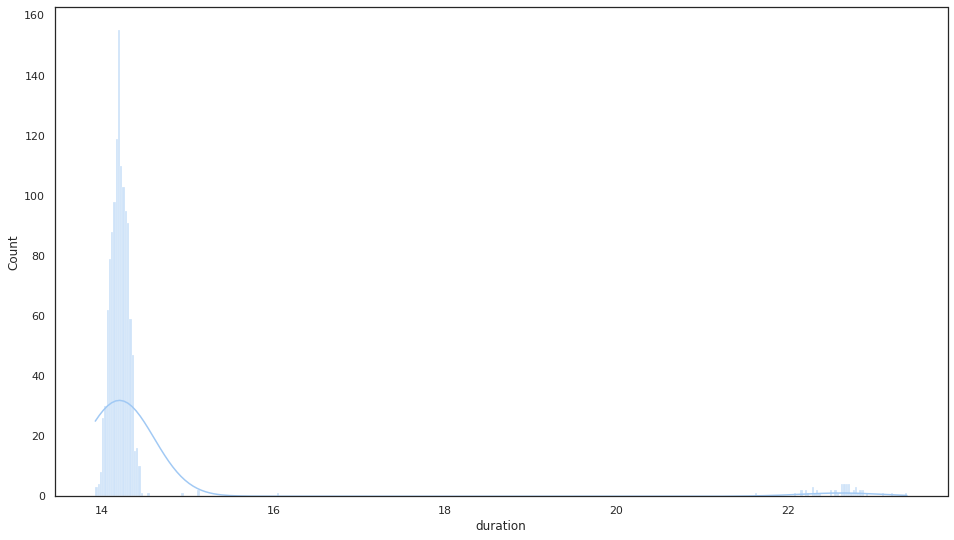

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.histplot(df['duration'], kde=True, ax=ax)
print(f'Mean: {df["duration"].mean():.3f}')
print(f'Standard deviation: {df["duration"].std():.5f}')

## Epoch duration

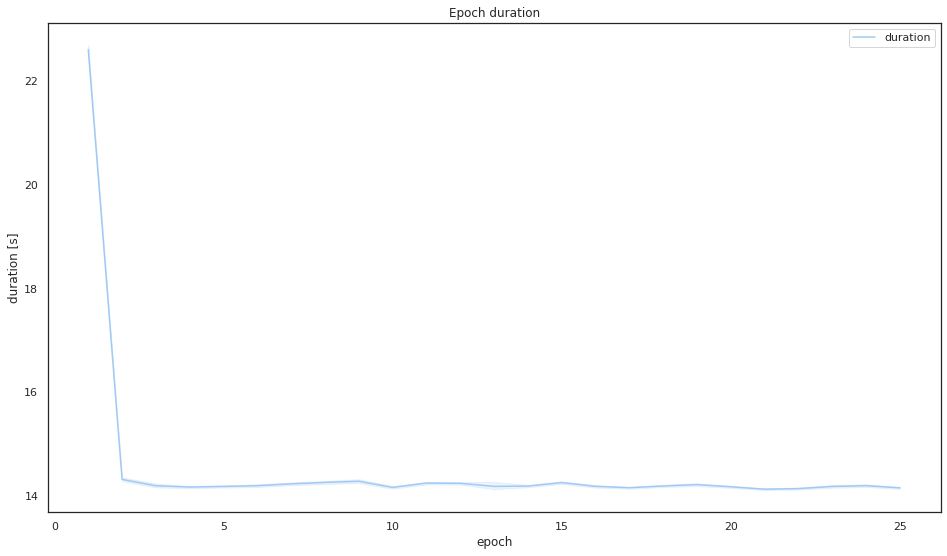

In [18]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df.set_index('epoch')[['duration']], ax=ax)
ax.set_ylabel('duration [s]')
ax.set_title('Epoch duration');

## Accuracies over time

The objective of this model is to achieve 94% validation accuracy in the least amount of time. The desired accuracy is reached on most runs.

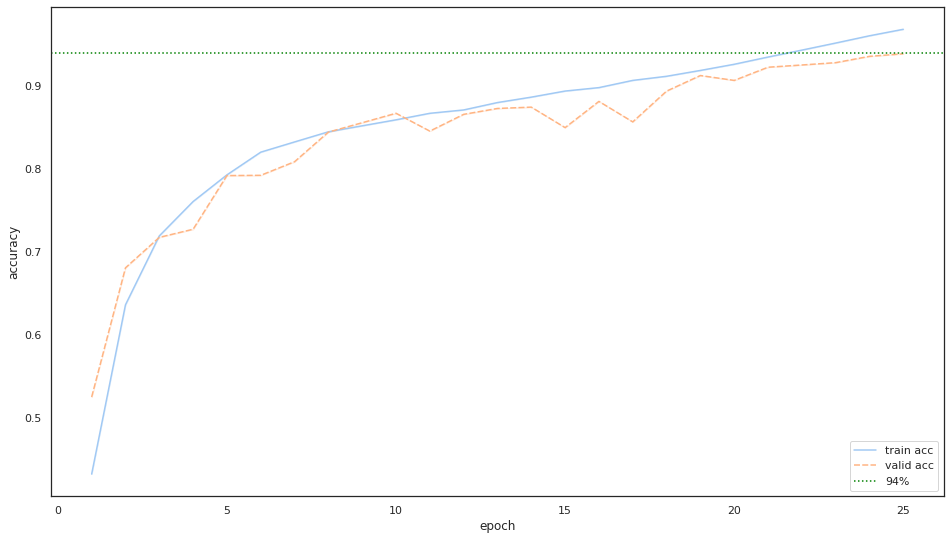

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df.set_index('epoch')[['train acc', 'valid acc']], ax=ax)
ax.axhline(0.94, linestyle=':', color='green', label='94%')
ax.set_ylabel('accuracy')
ax.legend();

## Cumulative energy consumption versus epoch

In [20]:
df_cum_energy_epoch = df.set_index('epoch').groupby(level='epoch').mean().filter(regex='energy').cumsum()

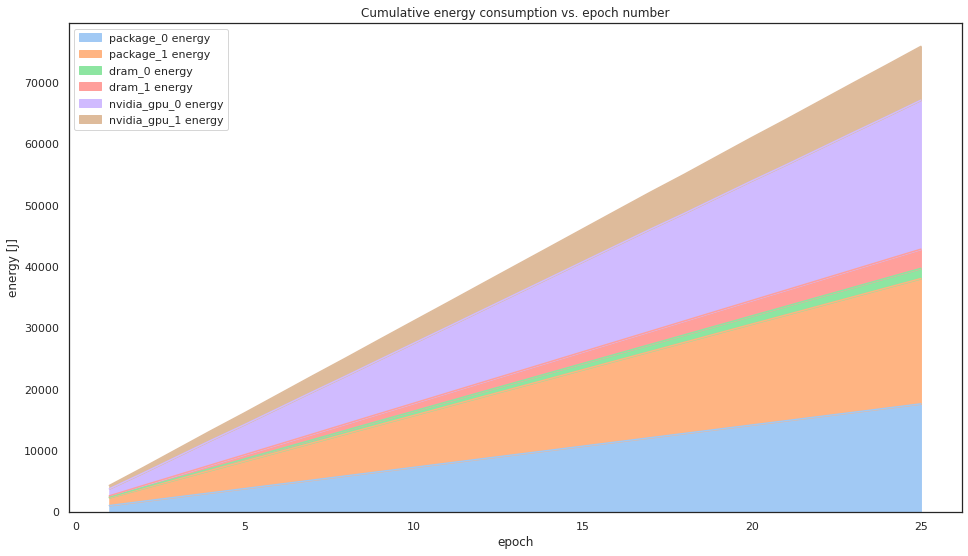

In [21]:
fig, ax = plt.subplots(figsize=(16, 9))
df_cum_energy_epoch.plot.area(ax=ax, ylabel='energy [J]', title='Cumulative energy consumption vs. epoch number');

## Cumulative energy consumption versus accuracy

As validation accuracy increases, the energy required for subsequent improvements grows considerably.

In [22]:
df_cum_energy_validacc = df.set_index('epoch').groupby(level='epoch').mean().set_index('valid acc').filter(regex='energy').cumsum()

In [23]:
acc_points = [0.6, 0.7, 0.8, 0.9]

series_cum_energy_validacc = df_cum_energy_validacc.sum(axis=1)
missing_accs = pd.Series({point: np.nan for point in acc_points})
series_cum_energy_validacc_interp = series_cum_energy_validacc.append(missing_accs).sort_index().interpolate(method='index')
energy_points = [series_cum_energy_validacc_interp[point] for point in acc_points]

print(f'Total energy consumed: {series_cum_energy_validacc.iloc[-1]:.2f}')

Total energy consumed: 75928.92


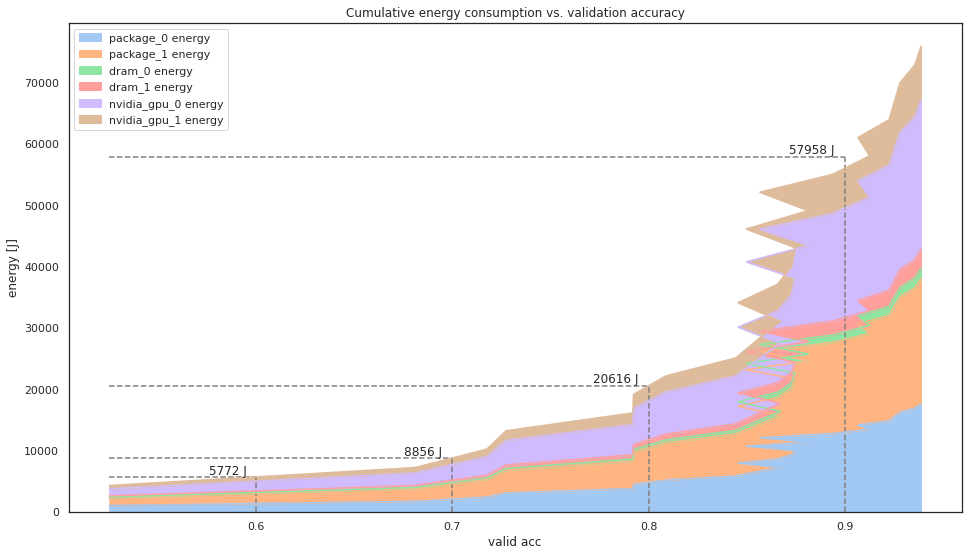

In [24]:
fig, ax = plt.subplots(figsize=(16, 9))
df_cum_energy_validacc.plot.area(ax=ax, ylabel='energy [J]', title='Cumulative energy consumption vs. validation accuracy')

ax.vlines(acc_points, 0, energy_points, color='gray', linestyle="dashed")
ax.hlines(energy_points, df_cum_energy_validacc.index[0], acc_points, color='gray', linestyle="dashed")

for x_point, y_point in zip(acc_points, energy_points):
    ax.text(x_point-0.005, y_point+400, f'{round(y_point)} J', horizontalalignment='right')

In [25]:
for i in range(len(acc_points) - 1):
    print(f'{int(acc_points[i]*100)}% → {int(acc_points[i+1]*100)}%: {round((energy_points[i+1] / energy_points[i] - 1) * 100)}% more energy')

60% → 70%: 53% more energy
70% → 80%: 133% more energy
80% → 90%: 181% more energy


## GPU Power

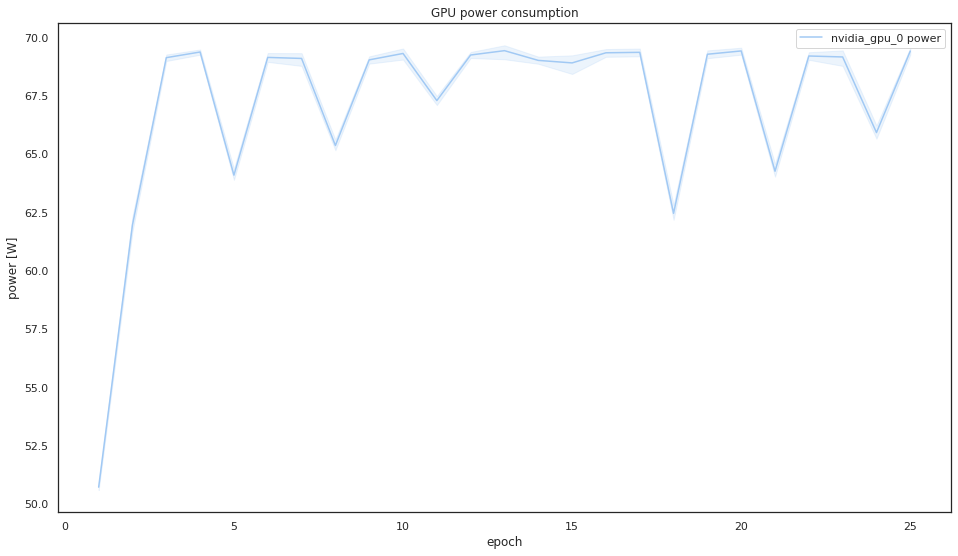

In [26]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df.set_index('epoch')[['nvidia_gpu_0 power']], ax=ax)
ax.set_ylabel('power [W]')
ax.set_title('GPU power consumption')
ax.legend();

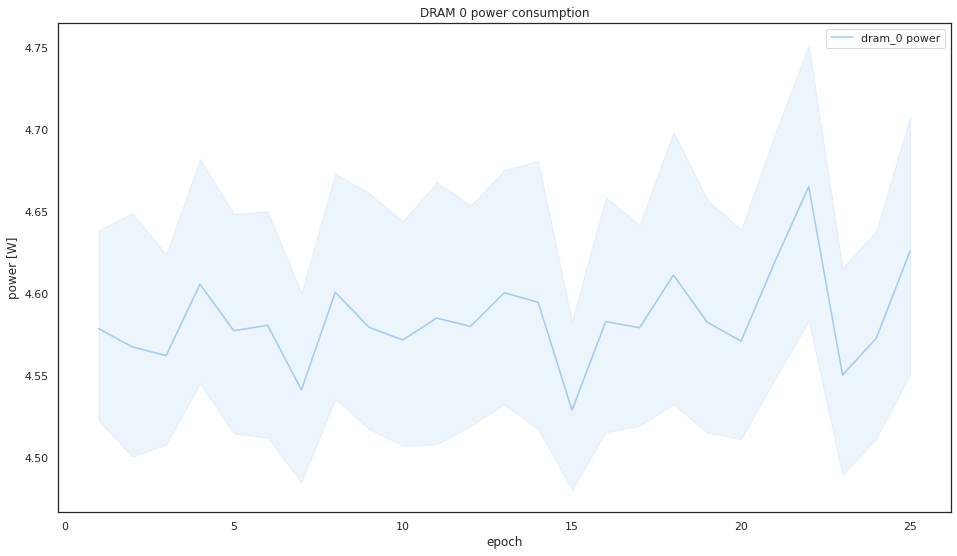

In [27]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df.set_index('epoch')[['dram_0 power']], ax=ax)
ax.set_ylabel('power [W]')
ax.set_title('DRAM 0 power consumption')
ax.legend();

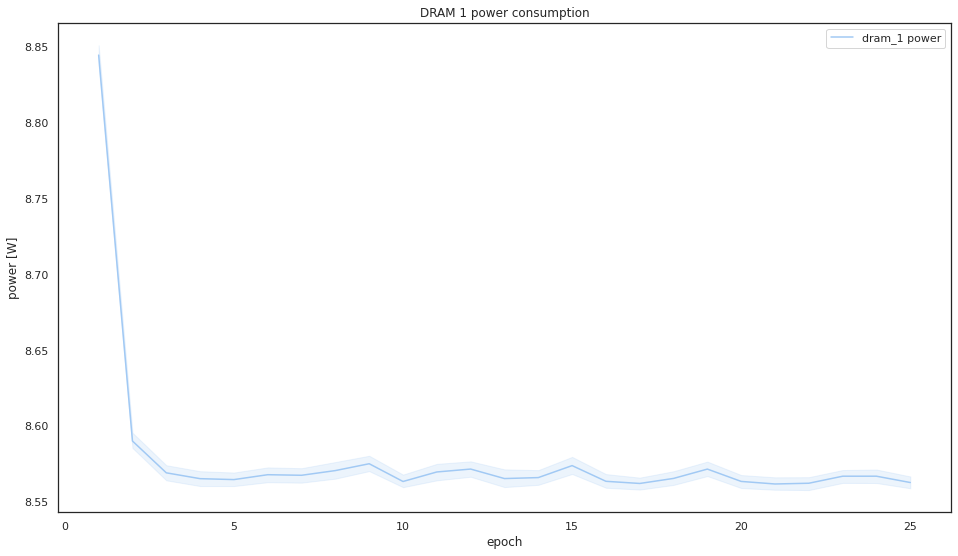

In [28]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df.set_index('epoch')[['dram_1 power']], ax=ax)
ax.set_ylabel('power [W]')
ax.set_title('DRAM 1 power consumption')
ax.legend();

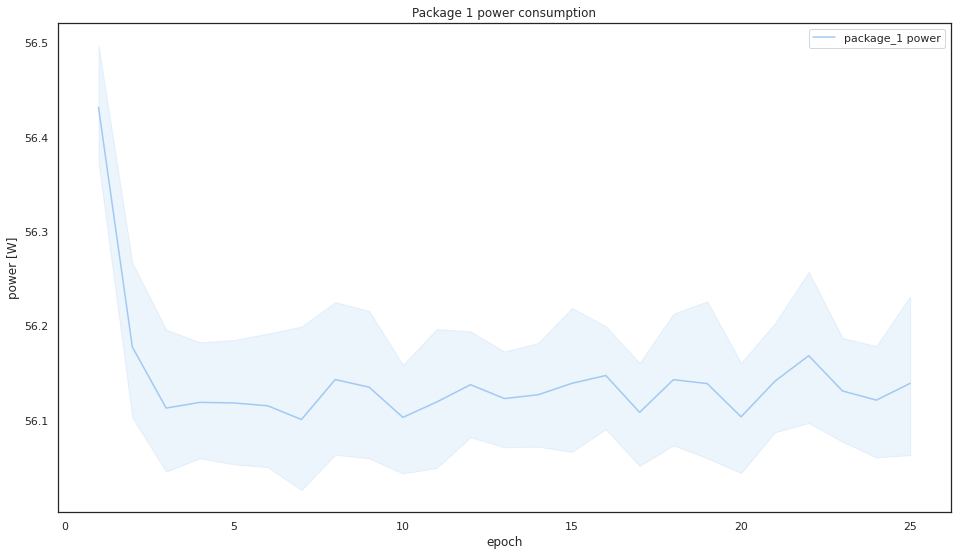

In [29]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df.set_index('epoch')[['package_1 power']], ax=ax)
ax.set_ylabel('power [W]')
ax.set_title('Package 1 power consumption')
ax.legend();

## Energy versus duration

These graphs compare the energy consumption to the duration of an epoch. The colors represent the epoch number inside its respective run.

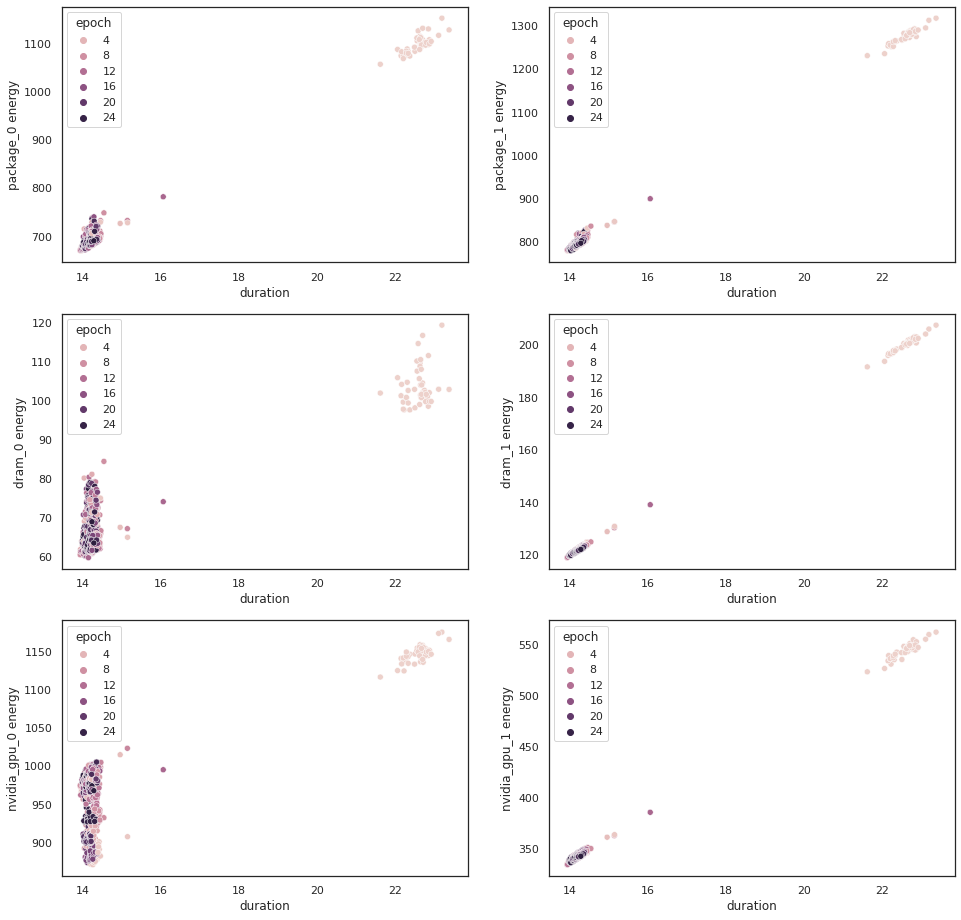

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
sns.scatterplot(data=df, x='duration', y='package_0 energy', ax=axs[0][0], hue='epoch')
sns.scatterplot(data=df, x='duration', y='package_1 energy', ax=axs[0][1], hue='epoch')
sns.scatterplot(data=df, x='duration', y='dram_0 energy', ax=axs[1][0], hue='epoch')
sns.scatterplot(data=df, x='duration', y='dram_1 energy', ax=axs[1][1], hue='epoch')
sns.scatterplot(data=df, x='duration', y='nvidia_gpu_0 energy', ax=axs[2][0], hue='epoch')
sns.scatterplot(data=df, x='duration', y='nvidia_gpu_1 energy', ax=axs[2][1], hue='epoch');

## Power versus duration

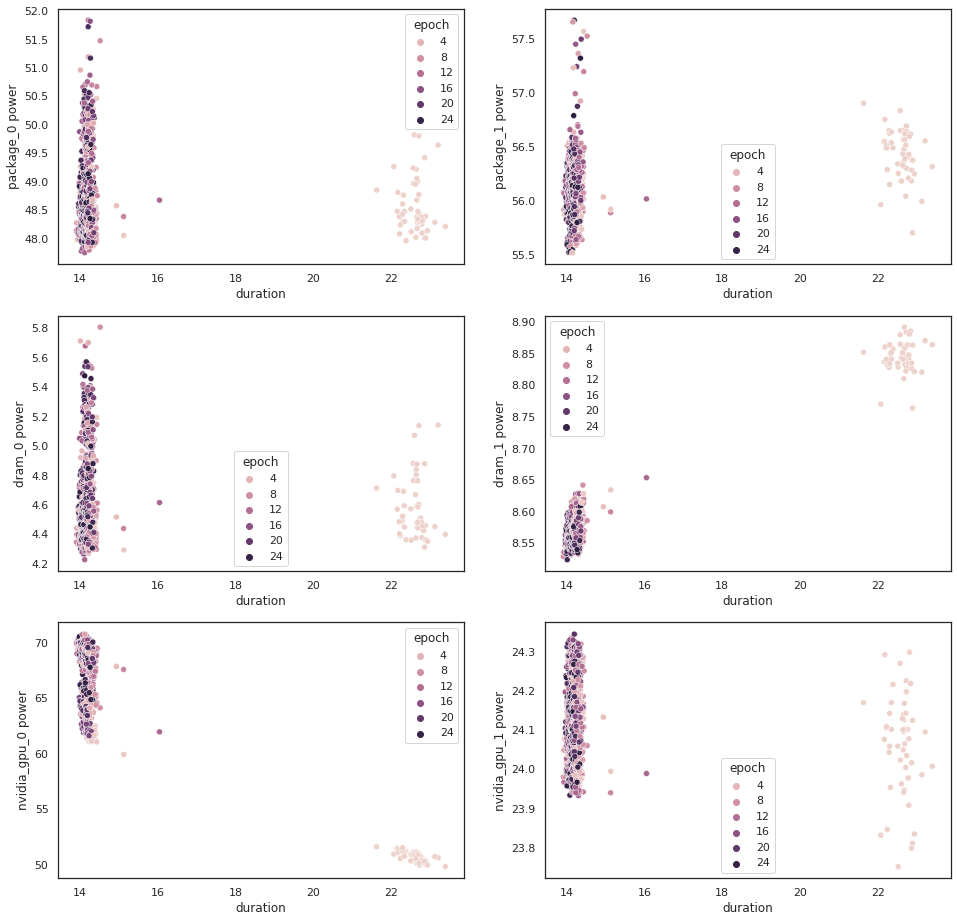

In [31]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
sns.scatterplot(data=df, x='duration', y='package_0 power', ax=axs[0][0], hue='epoch')
sns.scatterplot(data=df, x='duration', y='package_1 power', ax=axs[0][1], hue='epoch')
sns.scatterplot(data=df, x='duration', y='dram_0 power', ax=axs[1][0], hue='epoch')
sns.scatterplot(data=df, x='duration', y='dram_1 power', ax=axs[1][1], hue='epoch')
sns.scatterplot(data=df, x='duration', y='nvidia_gpu_0 power', ax=axs[2][0], hue='epoch')
sns.scatterplot(data=df, x='duration', y='nvidia_gpu_1 power', ax=axs[2][1], hue='epoch');

## Energy pair plots

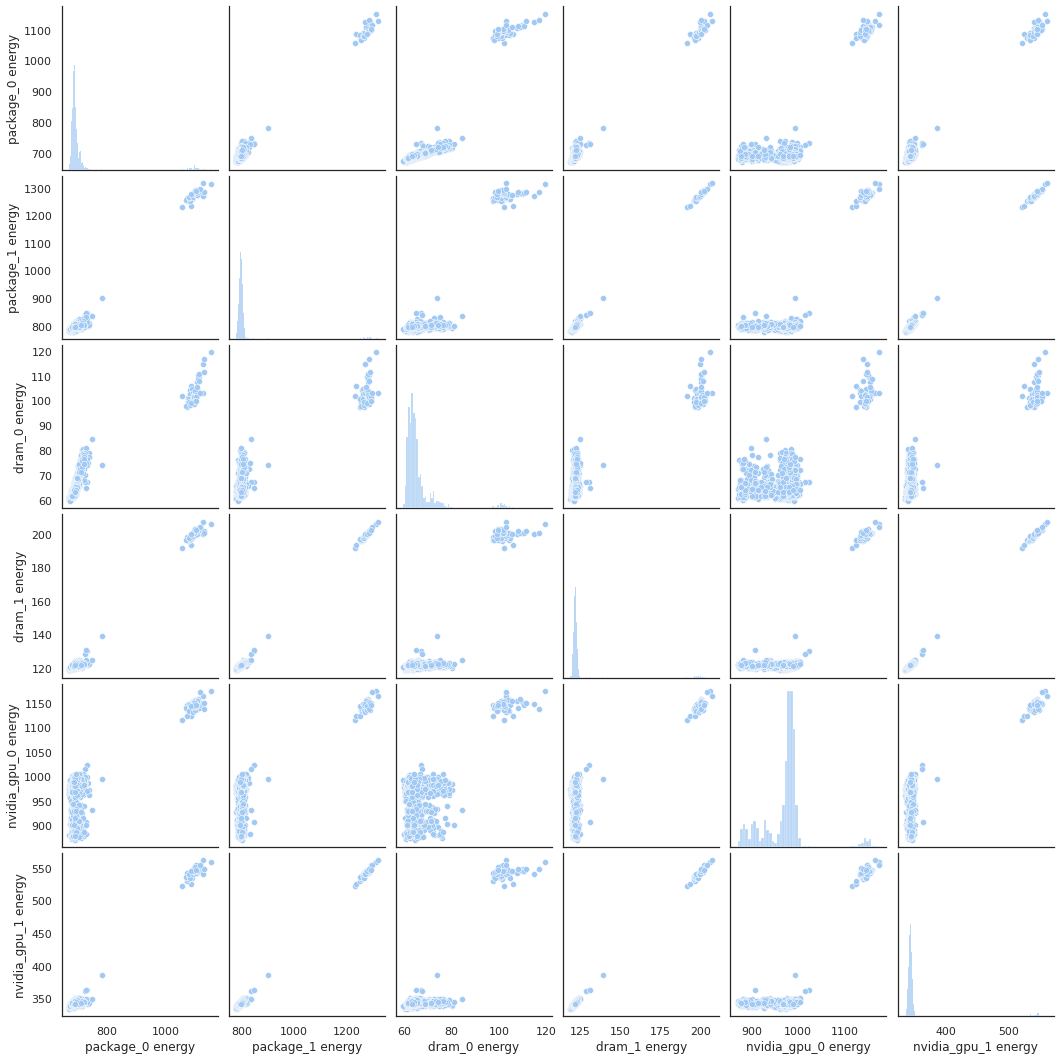

In [32]:
sns.pairplot(df.filter(regex='energy'));

## Power pair plots

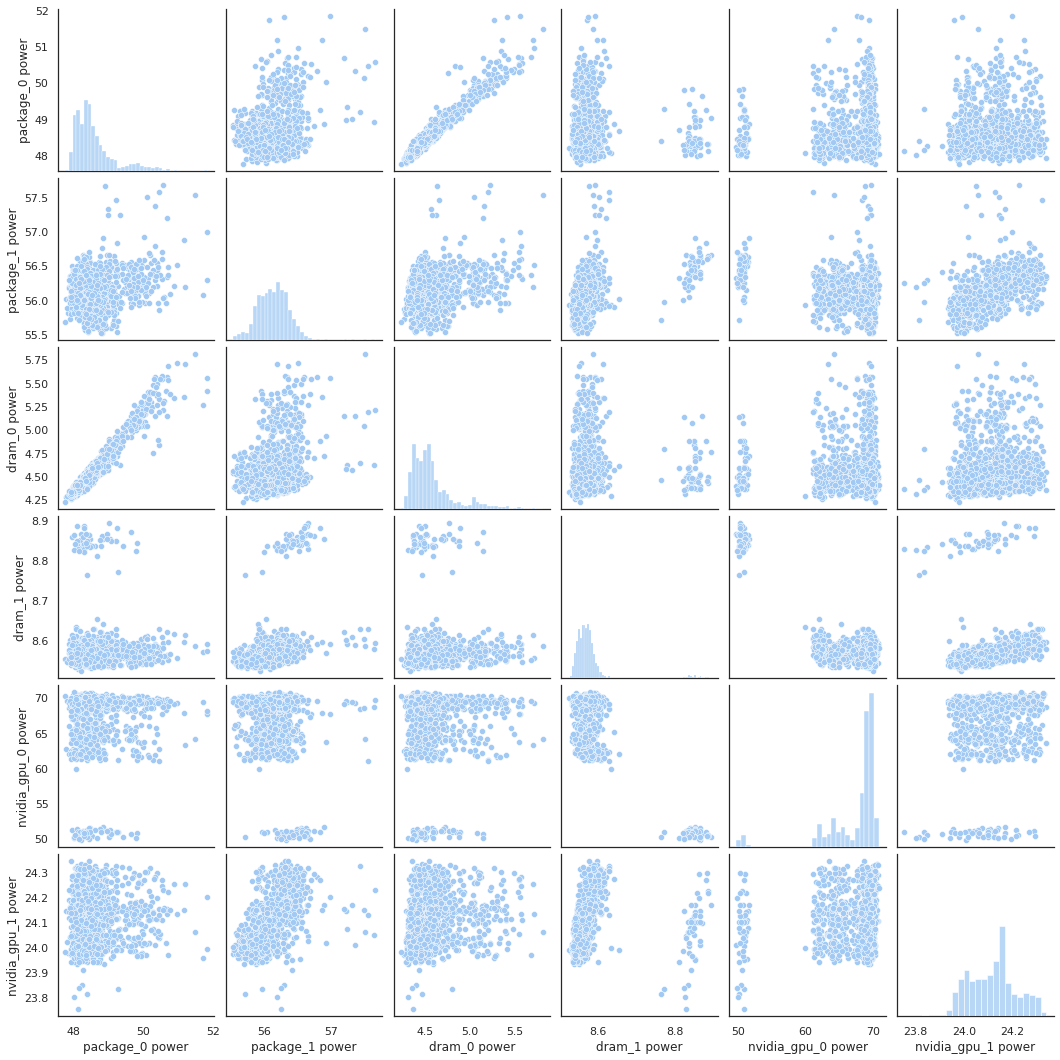

In [33]:
sns.pairplot(df.filter(regex='power'));

## Correlation matrix

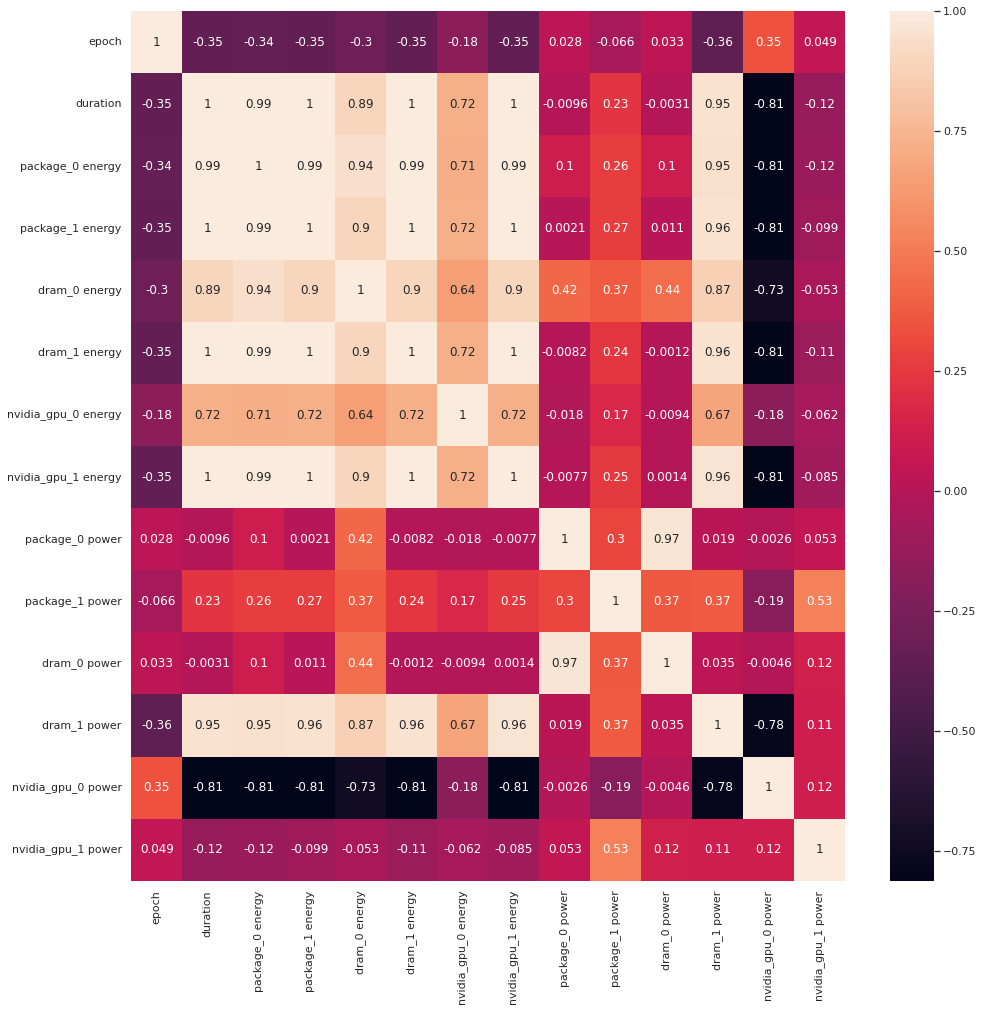

In [34]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(
    df
    .drop(['train acc'], axis=1)
    .drop(['valid acc'], axis=1)
    .corr(),
    annot=True,
    ax=ax);